# Explore here

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [45]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [46]:
ARTIST_ID_BONOBO = "0cmWgDlu9CwTgxPhf403hb"
BONOBO_URI = f"spotify:artist:{ARTIST_ID_BONOBO}"

results = spotify.artist_top_tracks(ARTIST_ID_BONOBO)

tracks = results['tracks']

# Print a header row
print(f"{'Track Name':40} {'Popularity':10} {'Duration (min)':15}")
print("-" * 70)

# isolate just the data I care to meddle with to make printing & converting to a DataFrame easier
flatter_track_data = [{
    "name": each_track["name"],
    "popularity": each_track["popularity"],
    "duration_min": each_track["duration_ms"] / 60000
} for each_track in tracks[:10]]  # Limit to top 10

# Print track details
for each_track in flatter_track_data:
    print(f"{each_track['name'][:37]:40} {each_track['popularity']:<10} {each_track['duration_min']:<15.2f}")

Track Name                               Popularity Duration (min) 
----------------------------------------------------------------------
Cirrus                                   63         5.87           
Kong                                     62         3.96           
Rosewood                                 60         4.05           
Shadows                                  59         4.75           
Days To Come                             60         3.83           
Tides                                    57         3.77           
Kerala                                   58         3.96           
Break Apart                              58         4.58           
Dark Will Fall (feat. Jacob Lusk)        45         2.28           
Terrapin                                 48         4.64           


In [47]:
df = pd.DataFrame(flatter_track_data)

# sort the songs by increasing popularity and display the resulting top 3
print(df.sort_values(by=['popularity'], ascending=True).tail(3))

           name  popularity  duration_min
4  Days To Come          60      3.825333
1          Kong          62      3.963767
0        Cirrus          63      5.870767


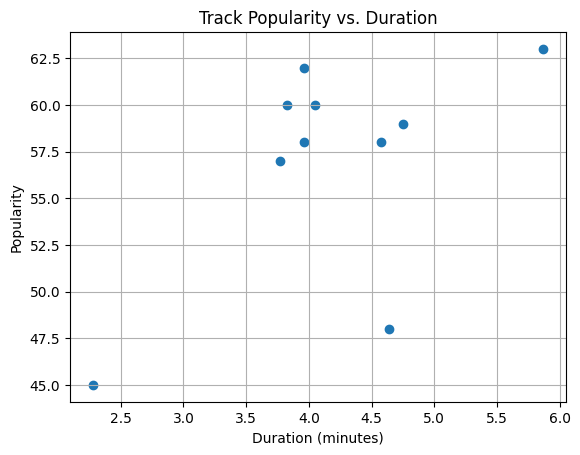

In [48]:
plt.figure()
plt.scatter(df['duration_min'], df['popularity'])

plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Track Popularity vs. Duration')
plt.grid(True)

plt.show()

In [ ]:
# commenting this cell out because it returns HTTP 403 errors
# new apps/code can't use the audio_features endpoint as of late 2024
# see https://developer.spotify.com/blog/2024-11-27-changes-to-the-web-api for details

#track_ids = [track["id"] for track in results["tracks"]]
#features = spotify.audio_features(track_ids)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2lJ4d8MCT6ZlDRHKJ1br14,7Cg3F9ZsZ2TYUnlza49NYh,2ZaL63zLMDr6H18El2EIt9,7aLYQgzGLy8duSSdTJa1ik,1mRTSIs40qa2L7omBzQd1u,622fSIVOm6SPcLPNOoYeJn,5DAjrJqXqYtgr67pVhmUeR,2pYvd6cHcAIMAM6xMD6nok,28EZTT9V9KET0WNRQhrmi1,44syVsiS6uTaLRDbr1QIfr with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=2lJ4d8MCT6ZlDRHKJ1br14,7Cg3F9ZsZ2TYUnlza49NYh,2ZaL63zLMDr6H18El2EIt9,7aLYQgzGLy8duSSdTJa1ik,1mRTSIs40qa2L7omBzQd1u,622fSIVOm6SPcLPNOoYeJn,5DAjrJqXqYtgr67pVhmUeR,2pYvd6cHcAIMAM6xMD6nok,28EZTT9V9KET0WNRQhrmi1,44syVsiS6uTaLRDbr1QIfr:
 None, reason: None